saya belum tahu cara memanggil fungsi tanimoto nya, dan sepertinya ada modul yang kurang (fingerprintmol)

In [3]:
# from rdkit import Chem

# load a mol from a SMILES string
mol = Chem.MolFromSmiles('CC(N)C(=O)O')

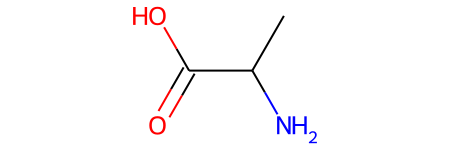

In [4]:
# from IPython import display
from IPython.display import SVG
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d

def draw2D(m):
    molSize = (450, 150)                    # draw area 
    mc = Chem.Mol(m.ToBinary())    
    if not mc.GetNumConformers():
        rdd.Compute2DCoords(mc)             # compute 2D coordinates of atoms
    drawer = draw2d.MolDraw2DSVG(\
        molSize[0],molSize[1])              # initialize drawer with size
    drawer.DrawMolecule(mc)                 # draw the molecule
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()           # get the SVG string 
    display(SVG(svg.replace('svg:','')))    # fix and display in Jupyter notebook
    
draw2D(mol)

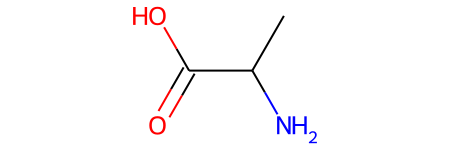

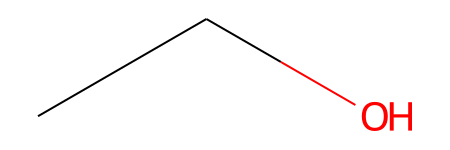

True

In [7]:

mol = Chem.MolFromSmiles('CC(N)C(=O)O')

# load a substructure from a SMILES string
pattern = Chem.MolFromSmiles('CCO')

draw2D(mol)
draw2D(pattern)

# perform substructure match on mol
#Membandingkan substruktur pada suatu molekul dengan suatu pecahan 
mol.HasSubstructMatch(pattern)    # returns true

RDKit provides tools for different kinds of similarity search, including Tanimoto, Dice, Cosine, Sokal, Russel… and more. Tanimoto is a very widely use similarity search metric because it incorporates substructure matching


In [10]:
import rdkit.Chem.Fingerprints.FingerprintMols

In [11]:
def tanimoto_similarity(ms, idx):
    # convert Mol to datastructure type using a list comprehension
    fps = [FingerprintMol(i) for i in ms]
    
    # set a query molecule: can be changed 
    query = fps[idx]
    
    # declare new list for similarities
    lst= []
    
    # loop through to find Tanimoto similarity
    for i in range(len(fps)):
        # tuple: (idx, similarity)
        lst.append((i, DataStructs.FingerprintSimilarity(query, fps[i])))
    
    # sort sim using the similarities
    lst.sort(key=lambda x:x[1], reverse=True)
    
    return lst

In [13]:
tanimoto_similarity('1', '1')

NameError: name 'FingerprintMol' is not defined